In [1]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

In [2]:
# import clean dataframe with customer information
df_clean = pd.read_csv('/Users/ilaydabekircan/Documents/Vision Bridge/DS Assignment/df_clean.csv')
df_clean.head(3)

,CustomerID,CustomerCity,CustomerState,Gender,Age,EmploymentStatus,Education,Occupation,Industry,Income,...,TotalAmountMin,OrderMonthMode,OrderWeekOfMonthMode,OrderSeasonMode,ItemPriceMean,MainCategoryMode,SubCategoryMode,TypeMode,PurchaseFlag,CampaignFlag
0,1,Los Angeles city,California,female,5 to 17 years,unemployed,less_than_high_school_diploma,Unknown,Unknown,46148,...,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,0,0
1,2,Nashville-Davidson metropolitan government (ba...,Tennessee,male,35 to 44 years,employed,some_college_or_associates_degree,management_business_science_arts,manufacturing,42639,...,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,0,0
2,3,Louisville/Jefferson County metro government (...,Kentucky,female,5 to 17 years,unemployed,less_than_high_school_diploma,Unknown,Unknown,42019,...,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,0,0


In [3]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            5000 non-null   int64  
 1   CustomerCity          5000 non-null   object 
 2   CustomerState         5000 non-null   object 
 3   Gender                5000 non-null   object 
 4   Age                   5000 non-null   object 
 5   EmploymentStatus      5000 non-null   object 
 6   Education             5000 non-null   object 
 7   Occupation            5000 non-null   object 
 8   Industry              5000 non-null   object 
 9   Income                5000 non-null   int64  
 10  OrderCount            5000 non-null   int64  
 11  OrderItemMean         5000 non-null   float64
 12  TotalAmountMax        5000 non-null   float64
 13  TotalAmountMin        5000 non-null   float64
 14  OrderMonthMode        5000 non-null   float64
 15  OrderWeekOfMonthMode 

CustomerID should not be in the dataset while clustering. Otherwise, the clustering algorithm will take it as a numerical column while the numeric information of customer identification is not important and it is only used as a key. Therefore, CustomerID is set as index.

In [4]:
df_clean.set_index('CustomerID', inplace = True)

KPrototypes clustering method can use both numerical and categorical data but we need to give the categorical columns as an argument to define them into the clustering.

In [5]:
# define an array with categorical columns' indexes
cat_cols = ['CustomerCity', 'CustomerState', 'Gender', 'Age', 'EmploymentStatus', 'Education', 'Occupation', 'Industry', 'MainCategoryMode',
           'SubCategoryMode', 'TypeMode']

cat_col_indices = [df_clean.columns.get_loc(col) for col in cat_cols]
cat_col_indices

[0, 1, 2, 3, 4, 5, 6, 7, 17, 18, 19]

In [6]:
# run KPrototypes from 1 to 10 clusters

costs = []
k = range(1,11)

for i in k:
    kp = KPrototypes(n_clusters = i, 
                     init = 'Cao', 
                     n_init = 3, 
                     verbose = 1)
    
    kp.fit(df_clean, 
           categorical = cat_col_indices)
    
    costs.append(kp.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 525156512915.2277
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 525156512915.2277
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 525156512915.2277
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 706, ncost: 210662145087.63507
Run: 1, iteration: 2/100, moves: 581, ncost: 166561660815.81674
Run: 1, iteration: 3/100, moves: 23, ncost: 166383884860.24625
Run: 1, iteration: 4/100, moves: 0, ncost: 166383884860.24625
Init: initializing centroids
Init: initializing clusters
Starting iter

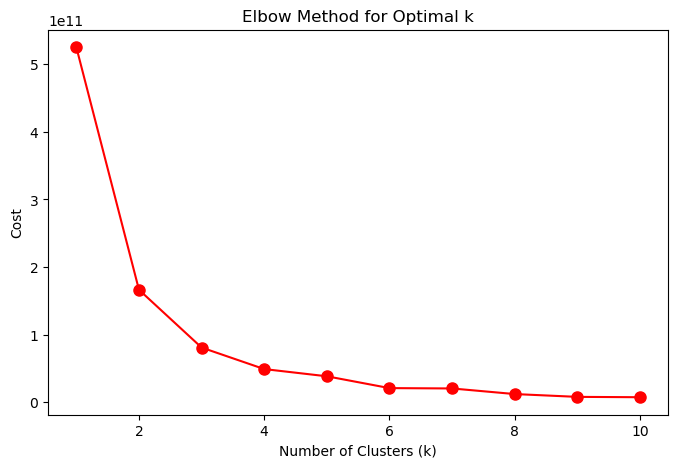

In [7]:
# plot the clusters for elbow method
plt.figure(figsize=(8, 5))
plt.plot(k, 
         costs, 
         'ro-', 
         markersize = 8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k')
plt.show()

We use elbow method to decide which cluster number we should choose. Since there is an elbow at k=3, we proceed with 3 clusters.

In [29]:
kp = KPrototypes(n_clusters = 3, 
                 init = 'Cao', 
                 n_init = 3, 
                 verbose = 1)

clusters = kp.fit_predict(df_clean, 
                          categorical = cat_col_indices)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1914, ncost: 81609680938.70001
Run: 1, iteration: 2/100, moves: 98, ncost: 80298151277.16623
Run: 1, iteration: 3/100, moves: 0, ncost: 80298151277.16623
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1422, ncost: 95145590424.81456
Run: 2, iteration: 2/100, moves: 577, ncost: 88979622676.30096
Run: 2, iteration: 3/100, moves: 575, ncost: 82871960747.30936
Run: 2, iteration: 4/100, moves: 68, ncost: 82768620657.81108
Run: 2, iteration: 5/100, moves: 0, ncost: 82768620657.81108
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1842, ncost: 153110205128.86603
Run: 3, iteration: 2/100, moves: 873, ncost: 81387779984.56166
Run: 3, iteration: 3/100, moves: 40, ncost: 80878910417.

In [31]:
# define cluster for each customer
# add 1 to get rid of index numbers (1,2,3 instead of 0,1,2)
df_clean['Segment'] = clusters + 1

In [33]:
df_clean['Segment'].value_counts()

2    3251
3    1005
1     744
Name: Segment, dtype: int64

In [43]:
path = '/Users/ilaydabekircan/Documents/Vision Bridge/DS Assignment/df_segment.csv'
df_clean.to_csv(path, index = False)